In [1]:
import numpy as np 
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def timeparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

In [3]:
data = pd.read_csv("input/bitflyerJPY_1-min_data_2017-07-04_to_2018-03-27.csv", 
                   parse_dates = True, index_col = [0], date_parser = timeparse)

In [4]:
data.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.790950e+05,3.790950e+05,3.790950e+05,3.790950e+05,3.790950e+05,3.790950e+05,3.790950e+05
mean,8.839840e+05,8.848989e+05,8.830490e+05,8.839836e+05,1.402789e+01,1.277390e+07,8.839532e+05
std,5.068571e+05,5.075346e+05,5.061647e+05,5.068531e+05,1.715429e+01,1.824239e+07,5.068359e+05
min,2.062910e+05,2.064800e+05,2.060000e+05,2.063460e+05,3.400000e-07,9.952650e-02,2.063754e+05
25%,4.626915e+05,4.629770e+05,4.623450e+05,4.626905e+05,3.584125e+00,2.292559e+06,4.626631e+05
50%,8.299990e+05,8.307160e+05,8.291490e+05,8.299850e+05,8.510724e+00,6.470122e+06,8.299169e+05
75%,1.177000e+06,1.178000e+06,1.175796e+06,1.176999e+06,1.789566e+01,1.589616e+07,1.176973e+06
max,2.312098e+06,2.312100e+06,2.300290e+06,2.312098e+06,7.574348e+02,6.936638e+08,2.311319e+06


In [5]:
data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

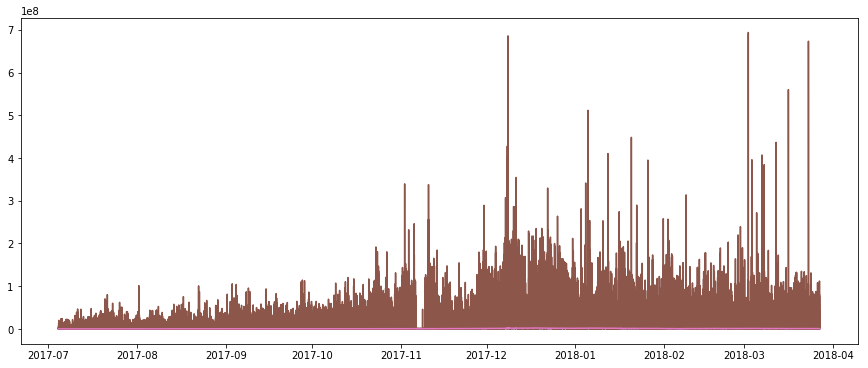

In [6]:
plt.plot(data)

In [7]:
data.shape

(379095, 7)

AttributeError: Unknown property subplot

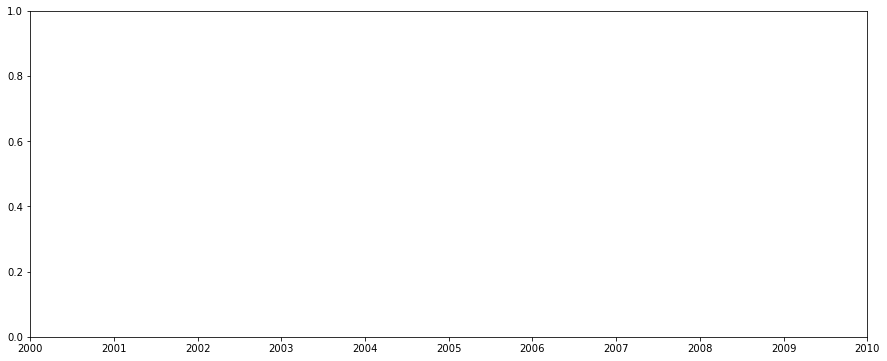

In [8]:
data.plot(subplot = True)

Plotting the difference between high and low prices

In [10]:
data["diff"] = data["High"] - data["Low"]
range_of_diff = data['diff'].max() - data['diff'].min()
range_of_diff

129720

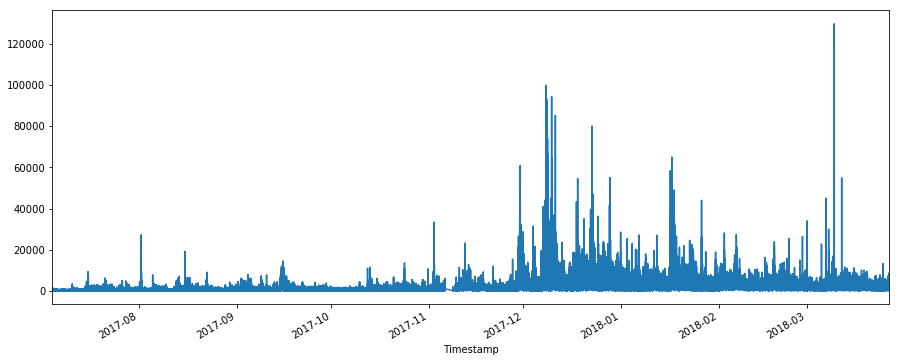

In [11]:
data["diff"].plot()

In [12]:
data[data['diff'] > (range_of_diff/2)]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,diff
Timestamp,,,,,,,,
2017-12-08 04:12:00,2270001,2270006,2186780,2189126,53.584062,1.200543e+08,2.240485e+06,83226
2017-12-08 04:13:00,2186780,2230000,2160600,2189999,62.841923,1.378720e+08,2.193949e+06,69400
2017-12-08 04:16:00,2222225,2294813,2215630,2240127,125.798639,2.826902e+08,2.247164e+06,79183
2017-12-08 04:17:00,2245000,2298500,2224510,2260362,114.528493,2.580242e+08,2.252926e+06,73990
2017-12-08 04:18:00,2269999,2279900,2208750,2254619,111.778453,2.500270e+08,2.236809e+06,71150
2017-12-08 04:19:00,2213237,2254618,2170600,2170600,82.849470,1.825919e+08,2.203899e+06,84018
2017-12-08 04:21:00,2170601,2199550,2099735,2109370,93.582768,1.990374e+08,2.126860e+06,99815
2017-12-08 04:28:00,2130603,2135936,2066772,2110000,79.860768,1.690125e+08,2.116339e+06,69164
2017-12-08 08:03:00,2055900,2098000,2009585,2070010,69.529759,1.438952e+08,2.069549e+06,88415


In [13]:
data[data['diff'] == 0].shape

(7059, 8)

In [14]:
#data_log = np.log(data)

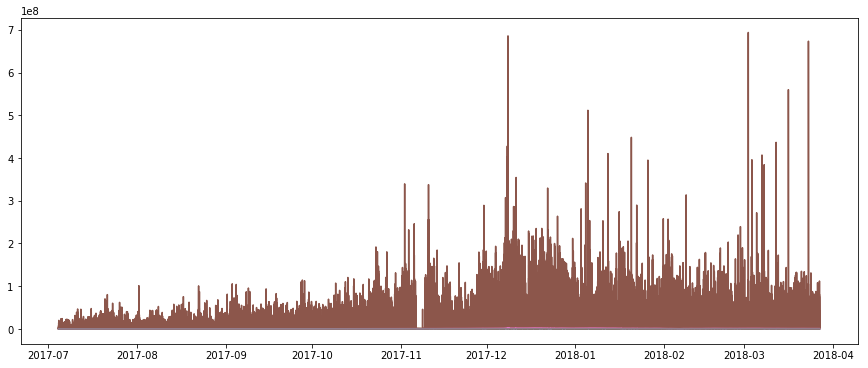

In [15]:
plt.plot(data)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


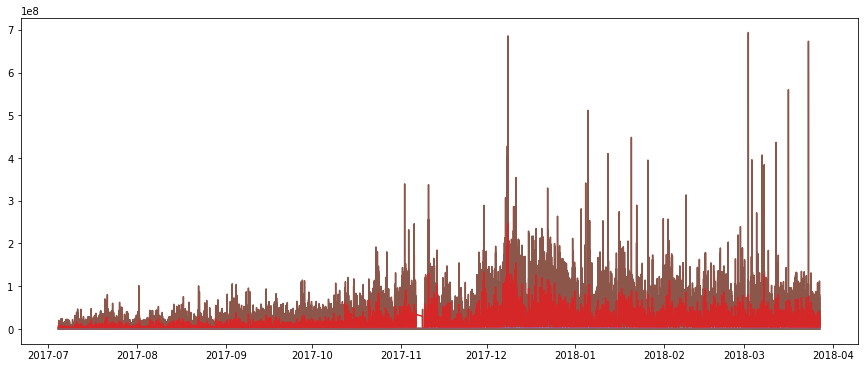

In [16]:
moving_avg = pd.rolling_mean(data,12)
plt.plot(data)
plt.plot(moving_avg)

In [17]:
data_moving_avg_diff = data - moving_avg
data_moving_avg_diff.head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,diff
Timestamp,,,,,,,,
2017-07-04 13:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 13:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 13:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 13:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 13:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 13:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 13:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 13:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 13:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data_moving_avg_diff.dropna()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,diff
Timestamp,,,,,,,,
2017-07-04 13:42:00,-240.166667,-189.916667,-142.250000,-6.000000,6.449847,1.907651e+06,-222.071018,-47.666667
2017-07-04 13:43:00,-36.083333,50.916667,151.583333,233.333333,0.545542,1.630417e+05,140.454277,-100.666667
2017-07-04 13:44:00,-59.083333,334.000000,-52.500000,-161.166667,-1.852832,-5.477963e+05,137.667368,386.500000
2017-07-04 13:45:00,-208.166667,2.750000,-47.583333,236.083333,-4.474888,-1.325631e+06,-48.444672,50.333333
2017-07-04 13:46:00,171.666667,365.416667,328.500000,578.333333,-0.256988,-7.335182e+04,330.556680,36.916667
2017-07-04 13:47:00,210.666667,248.750000,197.250000,319.583333,5.816276,1.727469e+06,268.506510,51.500000
2017-07-04 13:48:00,352.000000,318.833333,480.583333,272.916667,-1.033891,-3.036849e+05,312.891144,-161.750000
2017-07-04 13:49:00,508.166667,252.333333,430.083333,258.750000,-6.957585,-2.062175e+06,234.208964,-177.750000
2017-07-04 13:50:00,292.500000,281.666667,378.500000,216.333333,-3.421603,-1.012943e+06,383.561323,-96.833333


In [1]:
'''
decomposition = sm.tsa.seasonal_decompose(data['Close'], model='multiplicative')
fig = decomposition.plot()
fig.suptitle('Decomposition of multiplicative time series')
plt.show()
'''

"\ndecomposition = sm.tsa.seasonal_decompose(data['Close'], model='multiplicative')\nfig = decomposition.plot()\nfig.suptitle('Decomposition of multiplicative time series')\nplt.show()\n"

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


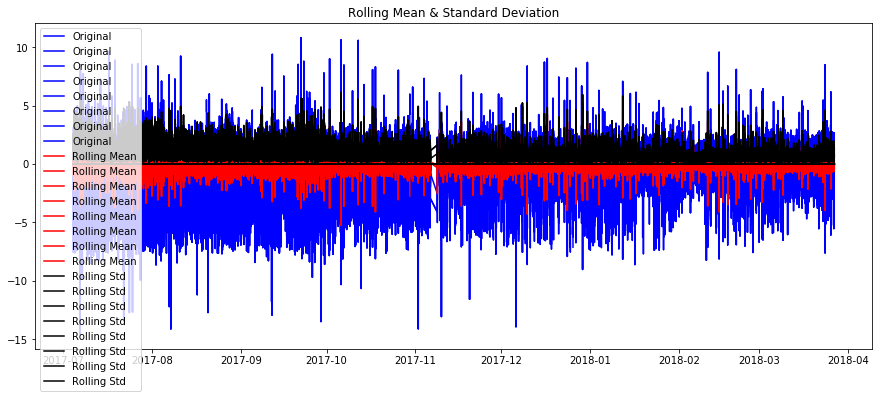

In [23]:
test_stationarity(data_log_moving_avg_diff)

First Order Differencing

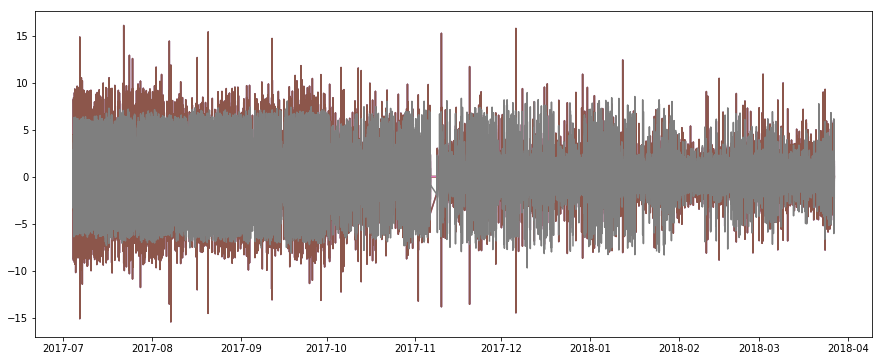

In [24]:
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)